# Fase 1: Exploración de bases de datos
## Base de datos: Intel Image Classification (Imágenes)

### Descargar y descomprimir la fuente de datos

In [3]:
# Instalar la librería Kaggle Hub
!pip install kagglehub

import kagglehub
import os

path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print(f"Los archivos del dataset se han descargado en: {path}")


train_dir = os.path.join(path, 'seg_train/seg_train')
test_dir = os.path.join(path, 'seg_test/seg_test')

print(f"Ruta de entrenamiento: {train_dir}")


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\juane\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 346M/346M [00:08<00:00, 41.8MB/s] 

Extracting files...


Los archivos del dataset se han descargado en: C:\Users\juane\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2
Ruta de entrenamiento: C:\Users\juane\.cache\kagglehub\datasets\puneet6060\intel-image-classification\versions\2\seg_train/seg_train


La fuente de datos es **secundaria**, dado que fue recolectada por Intel y publicada en la plataforma Kaggle para una competencia y uso de la comunidad. El enlace es: *https://www.kaggle.com/datasets/puneet6060/intel-image-classification*

### Instalación e importación de librerias necesarias para explorar los datos

In [5]:
# Instalar librerías necesarias para visualización y manejo de imágenes
!pip install matplotlib numpy Pillow

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Características básicas (número de registros, atributos, tamaño)

In [6]:
total_train_images = 0

# Listar las clases (son los nombres de las carpetas)
classes = os.listdir(train_dir)
print(f"Clases encontradas: {classes}\n")

# Contar imágenes (registros) por cada clase
print("Número de registros (imágenes) en el conjunto de entrenamiento:")
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))
        print(f"- Clase '{cls}': {count} imágenes")
        total_train_images += count

# Atributos de una imagen de ejemplo
sample_image_path = os.path.join(train_dir, classes[0], os.listdir(os.path.join(train_dir, classes[0]))[0])
sample_image = Image.open(sample_image_path)
width, height = sample_image.size
mode = sample_image.mode

# Tamaño total (según Kaggle)
dataset_size_gb = 1.4

print("\n--- Características Generales ---")
print(f"Número total de imágenes de entrenamiento: {total_train_images}")
print(f"Número de clases (atributos categóricos): {len(classes)}")
print(f"Tamaño aproximado del dataset: {dataset_size_gb} GB")
print(f"Dimensiones de una imagen de ejemplo (atributos numéricos): {width}x{height} píxeles")
print(f"Modo de color (canales): {mode}")

Clases encontradas: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

Número de registros (imágenes) en el conjunto de entrenamiento:
- Clase 'buildings': 2191 imágenes
- Clase 'forest': 2271 imágenes
- Clase 'glacier': 2404 imágenes
- Clase 'mountain': 2512 imágenes
- Clase 'sea': 2274 imágenes
- Clase 'street': 2382 imágenes

--- Características Generales ---
Número total de imágenes de entrenamiento: 14034
Número de clases (atributos categóricos): 6
Tamaño aproximado del dataset: 1.4 GB
Dimensiones de una imagen de ejemplo (atributos numéricos): 150x150 píxeles
Modo de color (canales): RGB


#### Visualización de una muestra de la base de datos
Para entender la naturaleza de los datos, se muestra una imagen de ejemplo por cada clase.

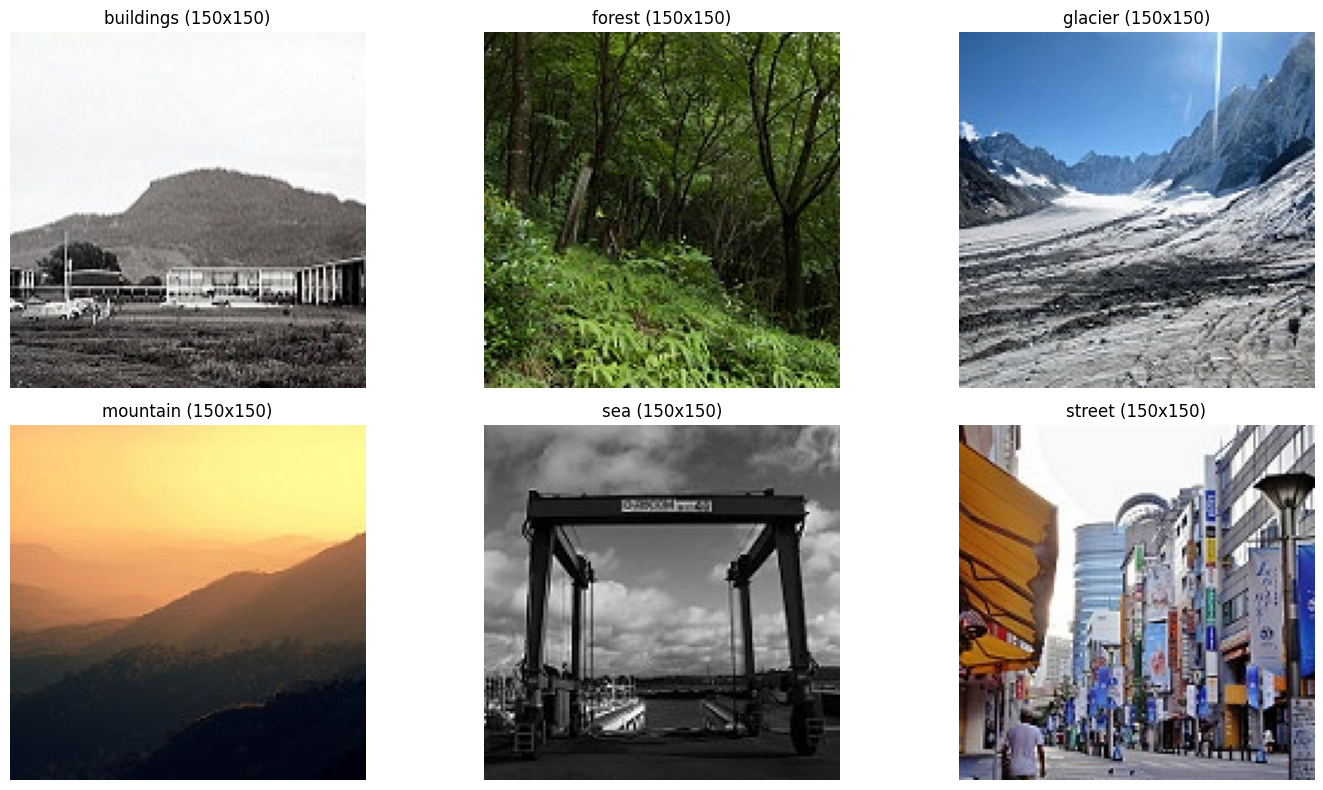

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, cls in enumerate(classes):
    class_path = os.path.join(train_dir, cls)
    if os.path.isdir(class_path):
        img_name = os.listdir(class_path)[0]
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        
        axes[i].imshow(img)
        axes[i].set_title(f"{cls} ({img.size[0]}x{img.size[1]})")
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## 3. Nivel de documentación disponible y posibles aplicaciones

**Nivel de documentación:**
La documentación es buena. En la página de Kaggle se encuentra una descripción clara del contenido, la estructura de las carpetas y el contexto de los datos. Al ser un dataset popular, también hay disponibles múltiples notebooks públicos que sirven como tutoriales y ejemplos de análisis.

**Posibles aplicaciones:**
La principal aplicación es en el campo de la **visión por computador**, específicamente para entrenar modelos de **clasificación de imágenes**. El objetivo es crear un sistema que pueda identificar y etiquetar automáticamente escenas naturales. Esto podría usarse en:
- Sistemas de gestión y etiquetado automático de fotografías.
- Análisis de imágenes de drones o satélites para monitoreo ambiental (ej. deforestación).
- Aplicaciones de turismo que sugieren destinos basados en preferencias visuales (montañas, mar, etc.).